# Fire Analysis

This notebook is for conducting data analysis about fires around Berkeley.

In [1]:
!pip install rtree 
!pip install pygeos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# include import statements here
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')


import zipfile
from pathlib import Path


import os
import plotly


from pathlib import Path
data_dir = Path('.')
data_dir.mkdir(exist_ok = True)
file_path = data_dir / Path('data.zip')
dest_path = file_path


import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap


import geocoder
from geopy import *


from geopy.geocoders import Nominatim

In [3]:
us_disaster_declarations = pd.read_csv('/work/ca_daily_fire_2000_2021-v2.csv')
us_disaster_declarations.head()

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7


In [4]:
CA_fires = us_disaster_declarations[us_disaster_declarations["latitude"] >= 32] 
CA_fires = us_disaster_declarations[us_disaster_declarations["latitude"] <= 42]
CA_fires = us_disaster_declarations[us_disaster_declarations["longitude"] >= -124]
CA_fires = us_disaster_declarations[us_disaster_declarations["longitude"] <= -114]
sample = CA_fires.head(20)
sample

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
5,32.5006,-114.7917,2013-02-06,Terra,MODIS,45.0,0,296.4,74,2013,2
6,32.5025,-114.8179,2004-09-24,Terra,MODIS,37.6,0,316.4,77,2004,9
7,32.5044,-114.8044,2002-08-15,Terra,MODIS,13.2,0,315.7,67,2002,8
8,32.5075,-114.7997,2018-08-14,Terra,MODIS,20.5,0,309.9,69,2018,8
9,32.5121,-114.7494,2009-07-08,Aqua,MODIS,322.8,0,316.5,90,2009,7


In [5]:
us_disaster_declarations

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
221179,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
221180,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
221181,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


In [6]:
# Shows us points where there have been major earthquates (6.0 magnitude or more)
county_map = folium.Map(location=[37.871666, -122.272781], zoom_start=13)

for (index, row) in CA_fires.iterrows():  
   # Add a circle marker to the map
   folium.CircleMarker(location=[row.loc['latitude'], row.loc['longitude']], radius=7,
                       color='orange').add_to(county_map)

folium.GeoJson('/work/Census Tract Polygons 2010.geojson').add_to(county_map)
county_map.save(outfile="county_map_fires.html")

Text(0.5, 0, 'Year')

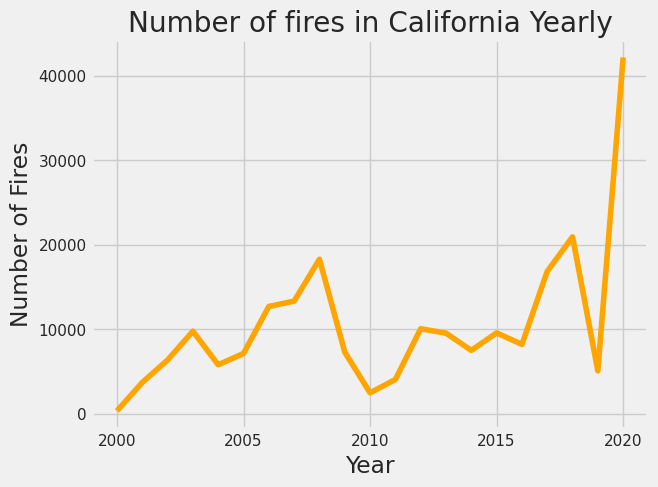

In [7]:
yearly_fires = CA_fires.groupby("year").count()
plt.plot(yearly_fires.index, yearly_fires["longitude"], color='orange')
plt.xticks([2000,2005, 2010, 2015, 2020])
plt.title('Number of fires in California Yearly')
plt.ylabel('Number of Fires')
plt.xlabel('Year')

In [8]:
import geopandas as gp

def assign_county(df, lat_col, lon_col, county_shapefile):
    # Load shapefile of California counties
    counties = gp.read_file(county_shapefile)

    # Convert input dataframe to geodataframe with Point geometry
    geometry = gp.points_from_xy(df[lon_col], df[lat_col])
    gdf = gp.GeoDataFrame(df, geometry=geometry)

    # Perform spatial join to assign counties to each point
    gdf = gp.sjoin(gdf, counties, op='within')

    # Extract county names and add to new column in input dataframe
    county_col = gdf['NAME']
    df['County'] = county_col.values

    return df


/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [9]:
!pip install geopandas shapely pandas

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [10]:
# [[37.909685, -122.242141], [37.902603, -122.231714], [37.896042, -122.226831], [37.886772, -122.224191], [37.872916, -122.222079], [37.864685, -122.226171]]
import geopandas as gp
census_tract_geojson = gp.read_file('/work/Census Tract Polygons 2010.geojson')
census_tract_geojson

,mtfcc10,name10,geo,totalpop,intptlat10,awater10,namelsad10,id,aland10,geoid10,tractce10,intptlon10,geometry
0,G5020,4238,"Census Tract 4238, Alameda County, California",2925.0,+37.8547587,0,Census Tract 4238,06001423800,1041971,06001423800,423800,-122.2441385,"MULTIPOLYGON (((-122.24192 37.85202, -122.2423..."
1,G5020,4222,"Census Tract 4222, Alameda County, California",3144.0,+37.8728822,0,Census Tract 4222,06001422200,674825,06001422200,422200,-122.2878154,"MULTIPOLYGON (((-122.29365 37.87345, -122.2937..."
2,G5020,4224,"Census Tract 4224, Alameda County, California",4196.0,+37.8752396,0,Census Tract 4224,06001422400,475569,06001422400,422400,-122.2695878,"MULTIPOLYGON (((-122.26689 37.87231, -122.2670..."
3,G5020,4225,"Census Tract 4225, Alameda County, California",4658.0,+37.8773131,0,Census Tract 4225,06001422500,460332,06001422500,422500,-122.2603183,"MULTIPOLYGON (((-122.26575 37.87881, -122.2655..."
4,G5020,4223,"Census Tract 4223, Alameda County, California",3387.0,+37.8740723,0,Census Tract 4223,06001422300,560051,06001422300,422300,-122.2779152,"MULTIPOLYGON (((-122.28233 37.87670, -122.2818..."
5,G5020,4218,"Census Tract 4218, Alameda County, California",2007.0,+37.8802854,0,Census Tract 4218,06001421800,528477,06001421800,421800,-122.2782006,"MULTIPOLYGON (((-122.27446 37.88406, -122.2744..."
6,G5020,4236.01,"Census Tract 4236.01, Alameda County, California",2642.0,+37.8588968,0,Census Tract 4236.01,06001423601,524803,06001423601,423601,-122.2587175,"MULTIPOLYGON (((-122.26025 37.86124, -122.2599..."
7,G5020,4216,"Census Tract 4216, Alameda County, California",3558.0,+37.8839567,0,Census Tract 4216,06001421600,1330318,06001421600,421600,-122.2559829,"MULTIPOLYGON (((-122.26661 37.88604, -122.2663..."
8,G5020,4217,"Census Tract 4217, Alameda County, California",3198.0,+37.8819398,0,Census Tract 4217,06001421700,573819,06001421700,421700,-122.2701843,"MULTIPOLYGON (((-122.27437 37.88321, -122.2744..."
9,G5020,4212,"Census Tract 4212, Alameda County, California",3563.0,+37.8975481,1509,Census Tract 4212,06001421200,1354146,06001421200,421200,-122.2752271,"MULTIPOLYGON (((-122.27684 37.89005, -122.2771..."


In [11]:
from typing import List, Dict, Tuple
from geopy.distance import distance

def calculate_risk(df: pd.DataFrame, lat_lon_list: List[List[float]]) -> Dict[Tuple[float, float], Tuple[float, float]]:
    # create a dictionary to store the risk values
    risk_dict = {}
    
    # calculate the average risk
    distances = []
    for index, row in df.iterrows():
        for lat_lon in lat_lon_list:
            distances.append(distance((row['intptlat10'], row['intptlon10']), tuple(lat_lon)).m)
    avg_distance = sum(distances) / len(distances)
    
    # loop through each row in the DataFrame
    for index, row in df.iterrows():
        # calculate the Manhattan distance between the row's latitude/longitude and each point in lat_lon_list
        distances = [distance((row['intptlat10'], row['intptlon10']), tuple(lat_lon)).m for lat_lon in lat_lon_list]
        max_distance = max(distances)
        
        # calculate the risk and percent risk, and store them in the dictionary
        key = (row['intptlat10'], row['intptlon10'])
        risk = max_distance * 100
        percent_risk = risk / avg_distance * 100
        risk_dict[key] = (risk, percent_risk)
    
    # create 'Risk' and 'Percent Risk' columns in the DataFrame and fill them in based on the values in the dictionary
    df['Fire Risk'], df['Normalized Fire Risk'] = zip(*df.apply(lambda row: risk_dict.get((row['intptlat10'], row['intptlon10'])), axis=1))
    
    return risk_dict

In [12]:
lat_lon_list = [[37.909685, -122.242141], [37.902603, -122.231714], [37.896042, -122.226831], [37.886772, -122.224191], [37.872916, -122.222079], [37.864685, -122.226171]]
census_tract_geojson_risk = calculate_risk(census_tract_geojson, lat_lon_list)

In [13]:
census_tract_geojson

,mtfcc10,name10,geo,totalpop,intptlat10,awater10,namelsad10,id,aland10,geoid10,tractce10,intptlon10,geometry,Fire Risk,Normalized Fire Risk
0,G5020,4238,"Census Tract 4238, Alameda County, California",2925.0,+37.8547587,0,Census Tract 4238,06001423800,1041971,06001423800,423800,-122.2441385,"MULTIPOLYGON (((-122.24192 37.85202, -122.2423...",609903.545405,12546.356820
1,G5020,4222,"Census Tract 4222, Alameda County, California",3144.0,+37.8728822,0,Census Tract 4222,06001422200,674825,06001422200,422200,-122.2878154,"MULTIPOLYGON (((-122.29365 37.87345, -122.2937...",594887.546289,12237.461940
2,G5020,4224,"Census Tract 4224, Alameda County, California",4196.0,+37.8752396,0,Census Tract 4224,06001422400,475569,06001422400,422400,-122.2695878,"MULTIPOLYGON (((-122.26689 37.87231, -122.2670...",452169.881796,9301.609612
3,G5020,4225,"Census Tract 4225, Alameda County, California",4658.0,+37.8773131,0,Census Tract 4225,06001422500,460332,06001422500,422500,-122.2603183,"MULTIPOLYGON (((-122.26575 37.87881, -122.2655...",393277.796800,8090.137539
4,G5020,4223,"Census Tract 4223, Alameda County, California",3387.0,+37.8740723,0,Census Tract 4223,06001422300,560051,06001422300,422300,-122.2779152,"MULTIPOLYGON (((-122.28233 37.87670, -122.2818...",515221.098033,10598.639385
5,G5020,4218,"Census Tract 4218, Alameda County, California",2007.0,+37.8802854,0,Census Tract 4218,06001421800,528477,06001421800,421800,-122.2782006,"MULTIPOLYGON (((-122.27446 37.88406, -122.2744...",500484.011255,10295.482024
6,G5020,4236.01,"Census Tract 4236.01, Alameda County, California",2642.0,+37.8588968,0,Census Tract 4236.01,06001423601,524803,06001423601,423601,-122.2587175,"MULTIPOLYGON (((-122.26025 37.86124, -122.2599...",582275.596043,11978.020870
7,G5020,4216,"Census Tract 4216, Alameda County, California",3558.0,+37.8839567,0,Census Tract 4216,06001421600,1330318,06001421600,421600,-122.2559829,"MULTIPOLYGON (((-122.26661 37.88604, -122.2663...",338455.254491,6962.380236
8,G5020,4217,"Census Tract 4217, Alameda County, California",3198.0,+37.8819398,0,Census Tract 4217,06001421700,573819,06001421700,421700,-122.2701843,"MULTIPOLYGON (((-122.27437 37.88321, -122.2744...",434913.195140,8946.621434
9,G5020,4212,"Census Tract 4212, Alameda County, California",3563.0,+37.8975481,1509,Census Tract 4212,06001421200,1354146,06001421200,421200,-122.2752271,"MULTIPOLYGON (((-122.27684 37.89005, -122.2771...",565066.796281,11624.017776


In [14]:
from typing import List, Dict, Tuple
import pandas as pd
from geopy.distance import distance
import geopandas as gpd

def calculate_risk(df: pd.DataFrame, lat_lon_list: List[List[float]]) -> Dict[Tuple[float, float], Tuple[float, float]]:
    # create a dictionary to store the risk values
    risk_dict = {}
    
    # calculate the average risk
    distances = []
    for index, row in df.iterrows():
        for lat_lon in lat_lon_list:
            distances.append(distance((row['intptlat10'], row['intptlon10']), tuple(lat_lon)).m)
    avg_distance = sum(distances) / len(distances)
    
    # loop through each row in the DataFrame
    for index, row in df.iterrows():
        # calculate the Manhattan distance between the row's latitude/longitude and each point in lat_lon_list
        distances = [distance((row['intptlat10'], row['intptlon10']), tuple(lat_lon)).m for lat_lon in lat_lon_list]
        max_distance = max(distances)
        
        # calculate the risk and percent risk, and store them in the dictionary
        key = (row['intptlat10'], row['intptlon10'])
        risk = max_distance * 100
        percent_risk = risk / avg_distance * 100
        risk_dict[key] = (risk, percent_risk)
    
    # create 'Risk' and 'Percent Risk' columns in the DataFrame and fill them in based on the values in the dictionary
    df['Risk'], df['Percent Risk'] = zip(*df.apply(lambda row: risk_dict.get((row['intptlat10'], row['intptlon10'])), axis=1))
    
    # convert the DataFrame to a GeoDataFrame
    geometry = gpd.points_from_xy(df['intptlon10'], df['intptlat10'])
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    
    return gdf



In [15]:
lat_lon_list = [[37.909685, -122.242141], [37.902603, -122.231714], [37.896042, -122.226831], [37.886772, -122.224191], [37.872916, -122.222079], [37.864685, -122.226171]]
# calculate the risk for each row in the DataFrame and convert it to a GeoDataFrame
gdf = calculate_risk(census_tract_geojson, lat_lon_list)
gdf


,mtfcc10,name10,geo,totalpop,intptlat10,awater10,namelsad10,id,aland10,geoid10,tractce10,intptlon10,geometry,Fire Risk,Normalized Fire Risk,Risk,Percent Risk
0,G5020,4238,"Census Tract 4238, Alameda County, California",2925.0,+37.8547587,0,Census Tract 4238,06001423800,1041971,06001423800,423800,-122.2441385,POINT (-122.24414 37.85476),609903.545405,12546.356820,609903.545405,12546.356820
1,G5020,4222,"Census Tract 4222, Alameda County, California",3144.0,+37.8728822,0,Census Tract 4222,06001422200,674825,06001422200,422200,-122.2878154,POINT (-122.28782 37.87288),594887.546289,12237.461940,594887.546289,12237.461940
2,G5020,4224,"Census Tract 4224, Alameda County, California",4196.0,+37.8752396,0,Census Tract 4224,06001422400,475569,06001422400,422400,-122.2695878,POINT (-122.26959 37.87524),452169.881796,9301.609612,452169.881796,9301.609612
3,G5020,4225,"Census Tract 4225, Alameda County, California",4658.0,+37.8773131,0,Census Tract 4225,06001422500,460332,06001422500,422500,-122.2603183,POINT (-122.26032 37.87731),393277.796800,8090.137539,393277.796800,8090.137539
4,G5020,4223,"Census Tract 4223, Alameda County, California",3387.0,+37.8740723,0,Census Tract 4223,06001422300,560051,06001422300,422300,-122.2779152,POINT (-122.27792 37.87407),515221.098033,10598.639385,515221.098033,10598.639385
5,G5020,4218,"Census Tract 4218, Alameda County, California",2007.0,+37.8802854,0,Census Tract 4218,06001421800,528477,06001421800,421800,-122.2782006,POINT (-122.27820 37.88029),500484.011255,10295.482024,500484.011255,10295.482024
6,G5020,4236.01,"Census Tract 4236.01, Alameda County, California",2642.0,+37.8588968,0,Census Tract 4236.01,06001423601,524803,06001423601,423601,-122.2587175,POINT (-122.25872 37.85890),582275.596043,11978.020870,582275.596043,11978.020870
7,G5020,4216,"Census Tract 4216, Alameda County, California",3558.0,+37.8839567,0,Census Tract 4216,06001421600,1330318,06001421600,421600,-122.2559829,POINT (-122.25598 37.88396),338455.254491,6962.380236,338455.254491,6962.380236
8,G5020,4217,"Census Tract 4217, Alameda County, California",3198.0,+37.8819398,0,Census Tract 4217,06001421700,573819,06001421700,421700,-122.2701843,POINT (-122.27018 37.88194),434913.195140,8946.621434,434913.195140,8946.621434
9,G5020,4212,"Census Tract 4212, Alameda County, California",3563.0,+37.8975481,1509,Census Tract 4212,06001421200,1354146,06001421200,421200,-122.2752271,POINT (-122.27523 37.89755),565066.796281,11624.017776,565066.796281,11624.017776


In [16]:
# export the GeoDataFrame as a GeoJSON file
gdf.to_file('census_tract_geojson3.geojson', driver='GeoJSON')

In [17]:
# Read in the GeoJSON file as a GeoDataFrame
gdf2 = gpd.read_file('/work/census_tract_geojson3.geojson')

# Write the GeoDataFrame to a shapefile
gdf2.to_file('census_tract_geojson3.shp', driver='ESRI Shapefile')

/tmp/ipykernel_96/2985070267.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf2.to_file('census_tract_geojson3.shp', driver='ESRI Shapefile')


In [18]:
gdf_reduced = gdf[['name10', 'Fire Risk', 'Normalized Fire Risk']]
gdf_reduced2 = pd.DataFrame(gdf_reduced).drop('Normalized Fire Risk', axis=1)
# define the function to apply to the 'Value' column
def normalize_value(value):
    return (value - gdf_reduced2['Fire Risk'].min()) / (gdf_reduced2['Fire Risk'].max() - gdf_reduced2['Fire Risk'].min()).round(2)

# apply the function to the 'Value' column and update the column
gdf_reduced2['Normalized Fire Risk'] = gdf_reduced2['Fire Risk'].apply(normalize_value)
gdf_reduced2

,name10,Fire Risk,Normalized Fire Risk
0,4238,609903.545405,0.614149
1,4222,594887.546289,0.580176
2,4224,452169.881796,0.257278
3,4225,393277.796800,0.124036
4,4223,515221.098033,0.399931
5,4218,500484.011255,0.366589
6,4236.01,582275.596043,0.551641
7,4216,338455.254491,0.000000
8,4217,434913.195140,0.218235
9,4212,565066.796281,0.512707


In [19]:
gdf_reduced2.to_csv('gdf_reduced.csv')

In [20]:
gdf_reduced2['name10'].value_counts()

4225       1
4215       1
4222       1
4236.02    1
4221       1
4211       1
4220       1
4231       1
4233       1
4236.01    1
4230       1
4240.02    1
4223       1
4232       1
4213       1
4217       1
4238       1
4239.01    1
4227       1
4240.01    1
4219       1
4214       1
4216       1
4228       1
4234       1
4235       1
4239.02    1
4218       1
4229       1
4237       1
4224       1
4226       1
4212       1
Name: name10, dtype: int64

In [21]:
CA_fires.to_csv('California_fires.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6062e091-af91-4518-84bb-d2aa585f2b30' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>